# Load software

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
from IPython.display import display, HTML, Math
import matplotlib.pyplot as plt
import seaborn as sns
from functools import partial
from collections import defaultdict
import lmfit
from ipywidgets import interact

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.rcParams['font.sans-serif'].insert(0, 'Arial')
plt.rcParams['path.simplify_threshold'] = 1.0
plt.rcParams['font.size'] = 14

pd.options.display.max_columns = 48
pd.options.display.max_rows = 48

In [3]:
from fretbursts import *

/Users/maya/anaconda3/envs/py37/lib/python3.7/site-packages/fretbursts/__init__.py:63: UserWarning:  - Cannot import QT, custom GUI widgets disabled.
  warnings.warn((' - Cannot import QT, custom GUI widgets disabled.'))


 - Optimized (cython) burst search loaded.
 - Optimized (cython) photon counting loaded.
--------------------------------------------------------------
 You are running FRETBursts (version 0.7).

 If you use this software please cite the following paper:

   FRETBursts: An Open Source Toolkit for Analysis of Freely-Diffusing Single-Molecule FRET
   Ingargiola et al. (2016). http://dx.doi.org/10.1371/journal.pone.0160716 

--------------------------------------------------------------


In [4]:
sns = init_notebook(apionly=True)

In [5]:
plot_timetraces = True

# Define input data files

In [6]:
dir_ = './results'

In [7]:
ls $dir_

05_-8TA_-3NTD_500pM_bsearch_params_m_10_ph_sel_all_pax_True_F_6.csv
05_-8TA_-3NTD_500pM_bsearch_params_m_10_ph_sel_all_pax_True_min_rate_cps_50000.csv
06_-8TA_-3NTD_500pM_ASchip_bsearch_params_m_10_ph_sel_all_pax_True_F_6.csv
06_-8TA_-3NTD_500pM_ASchip_bsearch_params_m_10_ph_sel_all_pax_True_min_rate_cps_75000.csv
archive/


# Load  burst data

As a first step we create a list of each CSV file

In [8]:
# sort to have chronological order for measurements
filepaths = sorted([f for f in Path(dir_).glob('*.csv')
                   if 'bsearch_params' in f.stem]) 
fnames = [f.name for f in filepaths]
filepaths, fnames

([PosixPath('results/05_-8TA_-3NTD_500pM_bsearch_params_m_10_ph_sel_all_pax_True_F_6.csv'),
  PosixPath('results/05_-8TA_-3NTD_500pM_bsearch_params_m_10_ph_sel_all_pax_True_min_rate_cps_50000.csv'),
  PosixPath('results/06_-8TA_-3NTD_500pM_ASchip_bsearch_params_m_10_ph_sel_all_pax_True_F_6.csv'),
  PosixPath('results/06_-8TA_-3NTD_500pM_ASchip_bsearch_params_m_10_ph_sel_all_pax_True_min_rate_cps_75000.csv')],
 ['05_-8TA_-3NTD_500pM_bsearch_params_m_10_ph_sel_all_pax_True_F_6.csv',
  '05_-8TA_-3NTD_500pM_bsearch_params_m_10_ph_sel_all_pax_True_min_rate_cps_50000.csv',
  '06_-8TA_-3NTD_500pM_ASchip_bsearch_params_m_10_ph_sel_all_pax_True_F_6.csv',
  '06_-8TA_-3NTD_500pM_ASchip_bsearch_params_m_10_ph_sel_all_pax_True_min_rate_cps_75000.csv'])

In [9]:
sample_description_noflow = 'no_flow_control'
sample_description_flow = 'Streets_chip'
burst_search_F6 = 'F=6'
burst_search_50kcps = '50kcps'
burst_search_75kcps = '75kcps'

In [10]:
df_noflow_F6 = pd.read_csv(filepaths[0], index_col=0).assign(sample_description=sample_description_noflow).assign(burst_search=burst_search_F6)
df_noflow_F6.head()

,size_raw,t_start,t_stop,width_ms,E,S,nd,na,nt,nda,naa,max_rate,nar,spot,sample_description,burst_search
0,10,0.111762,0.111955,0.192625,-0.109697,0.378698,0.566183,-0.251053,8.331979,4.513142,3.503707,32956.463262,-0.251053,0,no_flow_control,F=6
1,10,0.220837,0.221027,0.190137,0.365207,1.349317,3.571785,1.752189,8.353520,2.519430,0.510116,33499.804471,1.752189,0,no_flow_control,F=6
2,30,0.220874,0.221162,0.287987,0.116576,1.027020,13.351414,1.624658,27.506195,11.272115,1.258008,174177.702928,1.624658,0,no_flow_control,F=6
3,13,0.231640,0.231863,0.222663,-0.051113,1.052553,9.498535,-0.290202,11.071872,2.437223,-0.573684,58489.854491,-0.290202,0,no_flow_control,F=6
4,12,0.231769,0.231950,0.181125,-0.054505,0.709957,6.592083,-0.236065,10.431563,2.542209,1.533336,45575.087493,-0.236065,0,no_flow_control,F=6


In [11]:
df_noflow_50kcps = pd.read_csv(filepaths[1], index_col=0).assign(sample_description=sample_description_noflow).assign(burst_search=burst_search_50kcps)
df_noflow_50kcps.head()

,size_raw,t_start,t_stop,width_ms,E,S,nd,na,nt,nda,naa,max_rate,nar,spot,sample_description,burst_search
0,10,0.111762,0.111955,0.192625,-0.109697,0.378698,0.566183,-0.251053,8.331979,4.513142,3.503707,32956.463262,-0.251053,0,no_flow_control,50kcps
1,33,0.220837,0.221162,0.325062,0.163064,1.098282,15.267917,2.576337,30.185147,11.178408,1.162485,174177.702928,2.576337,0,no_flow_control,50kcps
2,13,0.231640,0.231863,0.222663,-0.051113,1.052553,9.498535,-0.290202,11.071872,2.437223,-0.573684,58489.854491,-0.290202,0,no_flow_control,50kcps
3,13,0.231704,0.231950,0.246125,-0.069871,0.731326,7.445694,-0.320781,10.868700,2.377922,1.365865,45575.087493,-0.320781,0,no_flow_control,50kcps
4,11,0.235145,0.235333,0.187812,0.365185,1.052354,3.577022,1.755219,9.373653,2.525306,1.516106,39125.668436,1.755219,0,no_flow_control,50kcps


In [12]:
df_flow_F6 = pd.read_csv(filepaths[2], index_col=0).assign(sample_description=sample_description_flow).assign(burst_search=burst_search_F6)
df_flow_F6.head()

,size_raw,t_start,t_stop,width_ms,E,S,nd,na,nt,nda,naa,max_rate,nar,spot,sample_description,burst_search
0,42,0.108156,0.108523,0.366663,0.119114,1.140394,20.286595,2.318644,36.535228,14.007784,-0.077795,213377.591246,2.318644,0,Streets_chip,F=6
1,13,0.250134,0.250263,0.129925,-0.047321,0.855822,4.392863,-0.241435,11.063586,6.294068,0.618089,96344.002960,-0.241435,0,Streets_chip,F=6
2,10,0.250196,0.250300,0.104188,-0.045236,1.027032,3.513134,-0.193608,8.447180,5.433910,-0.306256,61998.241448,-0.193608,0,Streets_chip,F=6
3,10,0.296548,0.296643,0.094950,0.246297,0.637988,0.556301,0.823558,8.584856,4.484101,2.720897,69468.469361,0.823558,0,Streets_chip,F=6
4,13,0.329709,0.329850,0.140937,0.314536,1.028358,7.341402,1.738101,10.899454,0.234233,1.585718,58297.988007,1.738101,0,Streets_chip,F=6


In [13]:
df_flow_75kcps = pd.read_csv(filepaths[3], index_col=0).assign(sample_description=sample_description_flow).assign(burst_search=burst_search_75kcps)
df_flow_75kcps.head()

/Users/maya/anaconda3/envs/py37/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,size_raw,t_start,t_stop,width_ms,E,S,nd,na,nt,nda,naa,max_rate,nar,spot,sample_description,burst_search
0,11,0.107461,0.107582,0.120512,0.166283,1.028721,3.436848,0.776056,9.203870,4.345210,0.645757,52532.416089,0.776056,0,Streets_chip,75kcps
1,10,0.107743,0.107872,0.128387,0.428293,1.034932,2.400048,1.761422,8.086501,2.302422,1.622608,47524.960464,1.761422,0,Streets_chip,75kcps
2,10,0.107810,0.107928,0.118563,0.245139,0.629519,1.445960,0.779679,8.232933,3.355805,2.651489,52688.558840,0.779679,0,Streets_chip,75kcps
3,42,0.108156,0.108523,0.366663,0.119114,1.140394,20.286595,2.318644,36.535228,14.007784,-0.077795,213377.591246,2.318644,0,Streets_chip,75kcps
4,11,0.139401,0.139531,0.129163,0.381998,1.031258,3.396427,1.759982,9.074950,2.298211,1.620330,51658.781100,1.759982,0,Streets_chip,75kcps


In [14]:
dataframe_list = [df_noflow_F6, df_noflow_50kcps, df_flow_F6, df_flow_75kcps]

bursts_all = pd.concat(dataframe_list, ignore_index=True)
#bursts_all['max_rate'] *= 1e-3
bursts_all.sample(10).sort_values(['sample_description', 'burst_search'])

,size_raw,t_start,t_stop,width_ms,E,S,nd,na,nt,nda,naa,max_rate,nar,spot,sample_description,burst_search
2170601,13,83.147830,83.147973,0.143088,-0.113145,0.434268,2.356936,-0.309797,9.043005,3.738740,3.257126,74348.320215,-0.309797,42,Streets_chip,75kcps
1299188,10,120.991814,120.991934,0.120000,0.329459,0.602760,2.447415,0.732048,5.908294,0.532426,2.196406,29431.121236,0.732048,17,Streets_chip,75kcps
1002758,11,96.261969,96.262097,0.128100,0.611932,0.618809,0.206360,1.711512,7.316709,1.964412,3.434425,35022.930229,1.711512,7,Streets_chip,75kcps
1861327,10,8.062598,8.062709,0.110425,0.309104,0.573655,0.479379,0.758661,6.732885,2.912066,2.582779,40271.409875,0.758661,33,Streets_chip,75kcps
737066,10,6.957447,6.957571,0.124962,0.237806,0.689398,3.378199,0.724516,7.465967,1.266091,2.097162,43927.629656,0.724516,3,Streets_chip,75kcps
1915274,11,146.436943,146.437059,0.116462,0.407046,0.332172,0.472658,0.748670,7.376401,1.708557,4.446516,44145.749348,0.748670,33,Streets_chip,75kcps
495513,14,154.212669,154.212819,0.149787,0.898118,1.731152,0.338738,6.725371,11.813911,1.187111,3.562691,95927.619187,6.725371,0,Streets_chip,F=6
241004,19,94.030443,94.030756,0.312987,0.071973,1.068116,8.487745,0.614966,16.544004,7.371220,0.070072,57358.736674,0.614966,2,no_flow_control,50kcps
287721,14,120.761385,120.761655,0.270325,0.712622,0.794086,0.564128,3.698292,11.725140,2.418688,5.044033,37186.133217,3.698292,9,no_flow_control,50kcps
22271,15,26.153508,26.153743,0.234775,-0.064699,0.803877,7.416209,-0.354603,12.298841,4.254670,0.982566,144954.432092,-0.354603,5,no_flow_control,F=6


In [15]:
bursts_all.groupby(['spot', 'sample_description', 'burst_search']).head()

,size_raw,t_start,t_stop,width_ms,E,S,nd,na,nt,nda,naa,max_rate,nar,spot,sample_description,burst_search
0,10,0.111762,0.111955,0.192625,-0.109697,0.378698,0.566183,-0.251053,8.331979,4.513142,3.503707,32956.463262,-0.251053,0,no_flow_control,F=6
1,10,0.220837,0.221027,0.190137,0.365207,1.349317,3.571785,1.752189,8.353520,2.519430,0.510116,33499.804471,1.752189,0,no_flow_control,F=6
2,30,0.220874,0.221162,0.287987,0.116576,1.027020,13.351414,1.624658,27.506195,11.272115,1.258008,174177.702928,1.624658,0,no_flow_control,F=6
3,13,0.231640,0.231863,0.222663,-0.051113,1.052553,9.498535,-0.290202,11.071872,2.437223,-0.573684,58489.854491,-0.290202,0,no_flow_control,F=6
4,12,0.231769,0.231950,0.181125,-0.054505,0.709957,6.592083,-0.236065,10.431563,2.542209,1.533336,45575.087493,-0.236065,0,no_flow_control,F=6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2297776,11,0.110058,0.110222,0.164400,-0.080635,1.178410,0.303714,-0.310762,7.124418,8.025713,-0.894247,43764.401105,-0.310762,47,Streets_chip,75kcps
2297777,10,0.139241,0.139362,0.121163,-0.069681,0.852218,-0.513161,-0.229031,7.143703,7.544954,0.340942,40173.243169,-0.229031,47,Streets_chip,75kcps
2297778,10,0.139866,0.139990,0.123450,0.338630,0.469136,1.477151,0.766645,7.089778,1.517483,3.328499,38949.777550,0.766645,47,Streets_chip,75kcps
2297779,12,0.140155,0.140302,0.147887,0.204715,0.704645,2.373650,0.720452,8.513686,3.224012,2.195572,44252.468146,0.720452,47,Streets_chip,75kcps


# Burst size distribution

In [16]:
num_bursts_list = [] 

for i, df in enumerate(dataframe_list):
    num_bursts = len(df)
    num_bursts_list.append(num_bursts)
    print(f'Number of bursts = {num_bursts}, sample ID = {i}')
num_bursts_list

Number of bursts = 231897, sample ID = 0
Number of bursts = 260600, sample ID = 1
Number of bursts = 222747, sample ID = 2
Number of bursts = 1605305, sample ID = 3


[231897, 260600, 222747, 1605305]

In [17]:
print(f'For the F=6 moving threshold burst search, the ratio of number of burst = '
      f'{(num_bursts_list[0] / num_bursts_list[2]):.2f}x')
print(f'For the constants threshold burst searches, i.e. 50kcps and 75kcps respectively, ' 
      f'the ratio of number of burst = '
      f'{(num_bursts_list[1] / num_bursts_list[3]):.3f}x')

For the F=6 moving threshold burst search, the ratio of number of burst = 1.04x
For the constants threshold burst searches, i.e. 50kcps and 75kcps respectively, the ratio of number of burst = 0.162x


In [18]:
mask_noflow = bursts_all.sample_description == sample_description_noflow
mask_flow = bursts_all.sample_description == sample_description_flow
mask_F6 = bursts_all.burst_search == 'F=6'
mask_50kcps = bursts_all.burst_search == '50kcps'
mask_75kcps = bursts_all.burst_search == '75kcps'

In [19]:
#size0 = bursts_all.loc[mask & (bursts_all.burst_search == 'F=6'), 'nt']
size0 = bursts_all.loc[mask_noflow, 'nt']
len(size0)

492497

In [20]:
size0 = bursts_all.loc[mask_noflow & mask_F6, 'nt']
#size0 = bursts_all.loc[mask, 'nt']
len(size0)

231897

## F = 6 burst search 

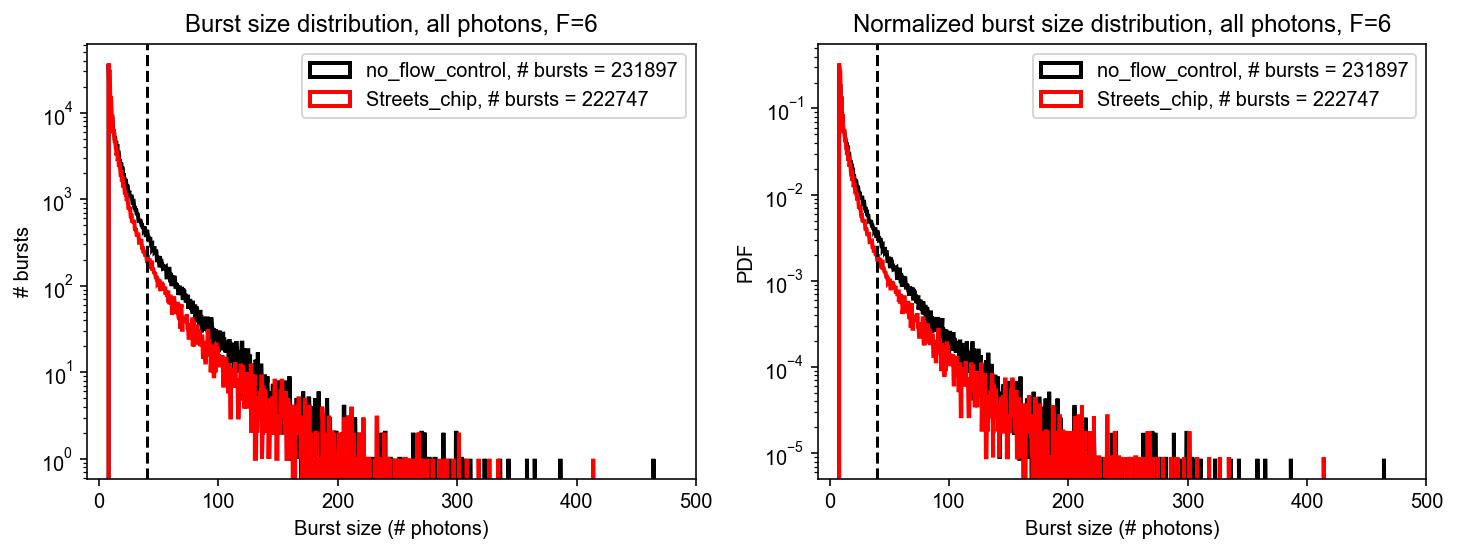

In [21]:
th1 = 40
column = 'nt'
binwidth = 0.5
hist_kws = dict(histtype='step', lw=2)

fig, ax = plt.subplots(1, 2, figsize=(12, 4), sharex=True)
size0 = bursts_all.loc[mask_noflow & mask_F6, column]
size1 = bursts_all.loc[mask_flow & mask_F6, column]
bins = np.arange(-1, size0.max(), binwidth)
#bin1 = np.arange(-1, size1.max(), binwidth)

ax[0].hist(size0, label=f'{sample_description_noflow}, # bursts = {num_bursts_list[0]}', color='k', bins=bins, **hist_kws)
ax[0].hist(size1, label=f'{sample_description_flow}, # bursts = {num_bursts_list[2]}', color='r', bins=bins, **hist_kws)
ax[0].set_yscale('log')
ax[0].axvline(th1, color='k', ls='--')
ax[0].legend(loc='upper right')
ax[0].set_ylabel('# bursts')
ax[0].set_xlabel('Burst size (# photons)')
ax[0].set_title('Burst size distribution, all photons, F=6');
ax[0].set_xlim(-10, 500)

th2 = 40
column = 'nt'
size2 = bursts_all.loc[mask_noflow & mask_F6, column]
size3 = bursts_all.loc[mask_flow & mask_F6, column]
bins = np.arange(-1, size2.max(), binwidth)
#bin1 = np.arange(-1, size3.max(), binwidth)

ax[1].hist(size2, density=True, stacked=True, label=f'{sample_description_noflow}, # bursts = {num_bursts_list[0]}',  
           color='k', bins=bins, range=(0,500), **hist_kws)
ax[1].hist(size3, density=True, stacked=True, label=f'{sample_description_flow}, # bursts = {num_bursts_list[2]}', 
           color='r', bins=bins, range=(0,500), **hist_kws)
ax[1].set_yscale('log')
ax[1].axvline(th2, color='k', ls='--')
ax[1].legend(loc='upper right')
ax[1].set_ylabel('PDF')
ax[1].set_xlabel('Burst size (# photons)')
ax[1].set_title('Normalized burst size distribution, all photons, F=6');
ax[1].set_xlim(-10, 500);

#plt.savefig('burst_size_distribution_vs_PDF_F=6.png', dpi=1200)

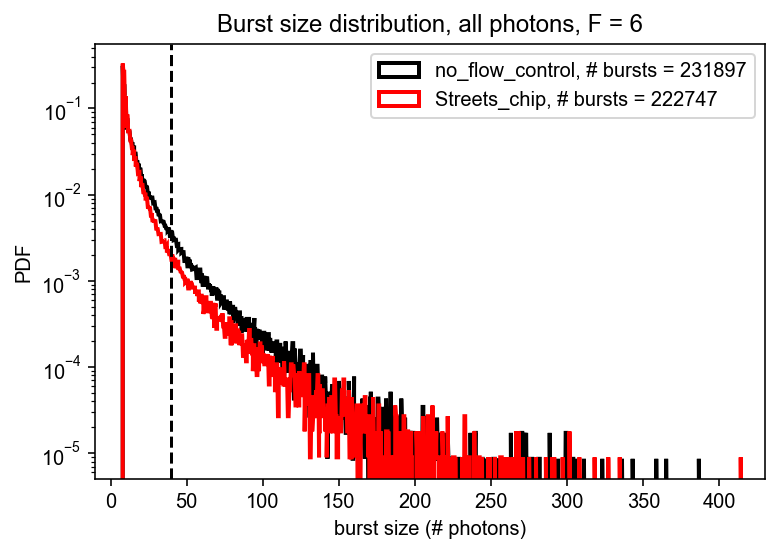

In [22]:
th = 40
column = 'nt'
binwidth = 0.5
hist_kws = dict(histtype='step', lw=2)

plt.figure()
size0 = bursts_all.loc[mask_noflow & mask_F6, column]
size1 = bursts_all.loc[mask_flow & mask_F6, column]
bins = np.arange(-1, size0.max(), binwidth)
#bins = np.arange(-1, size1.max(), binwidth)

plt.hist(size0, density=True, label=f'{sample_description_noflow}, # bursts = {num_bursts_list[0]}', 
         color='k', bins=bins, **hist_kws)
plt.hist(size1, density=True, label=f'{sample_description_flow}, # bursts = {num_bursts_list[2]}', 
         color='r', bins=bins, **hist_kws)
plt.xlim(-10, size0.quantile(0.99999) + 50)
plt.axvline(th, color='k', ls='--')
plt.legend(loc='upper right')
plt.yscale('log')
plt.ylabel('PDF')
plt.xlabel('burst size (# photons)')
plt.title(f'Burst size distribution, all photons, F = 6');
#plt.savefig('burst_size_PDF_nt_F6.png', dpi=1200)

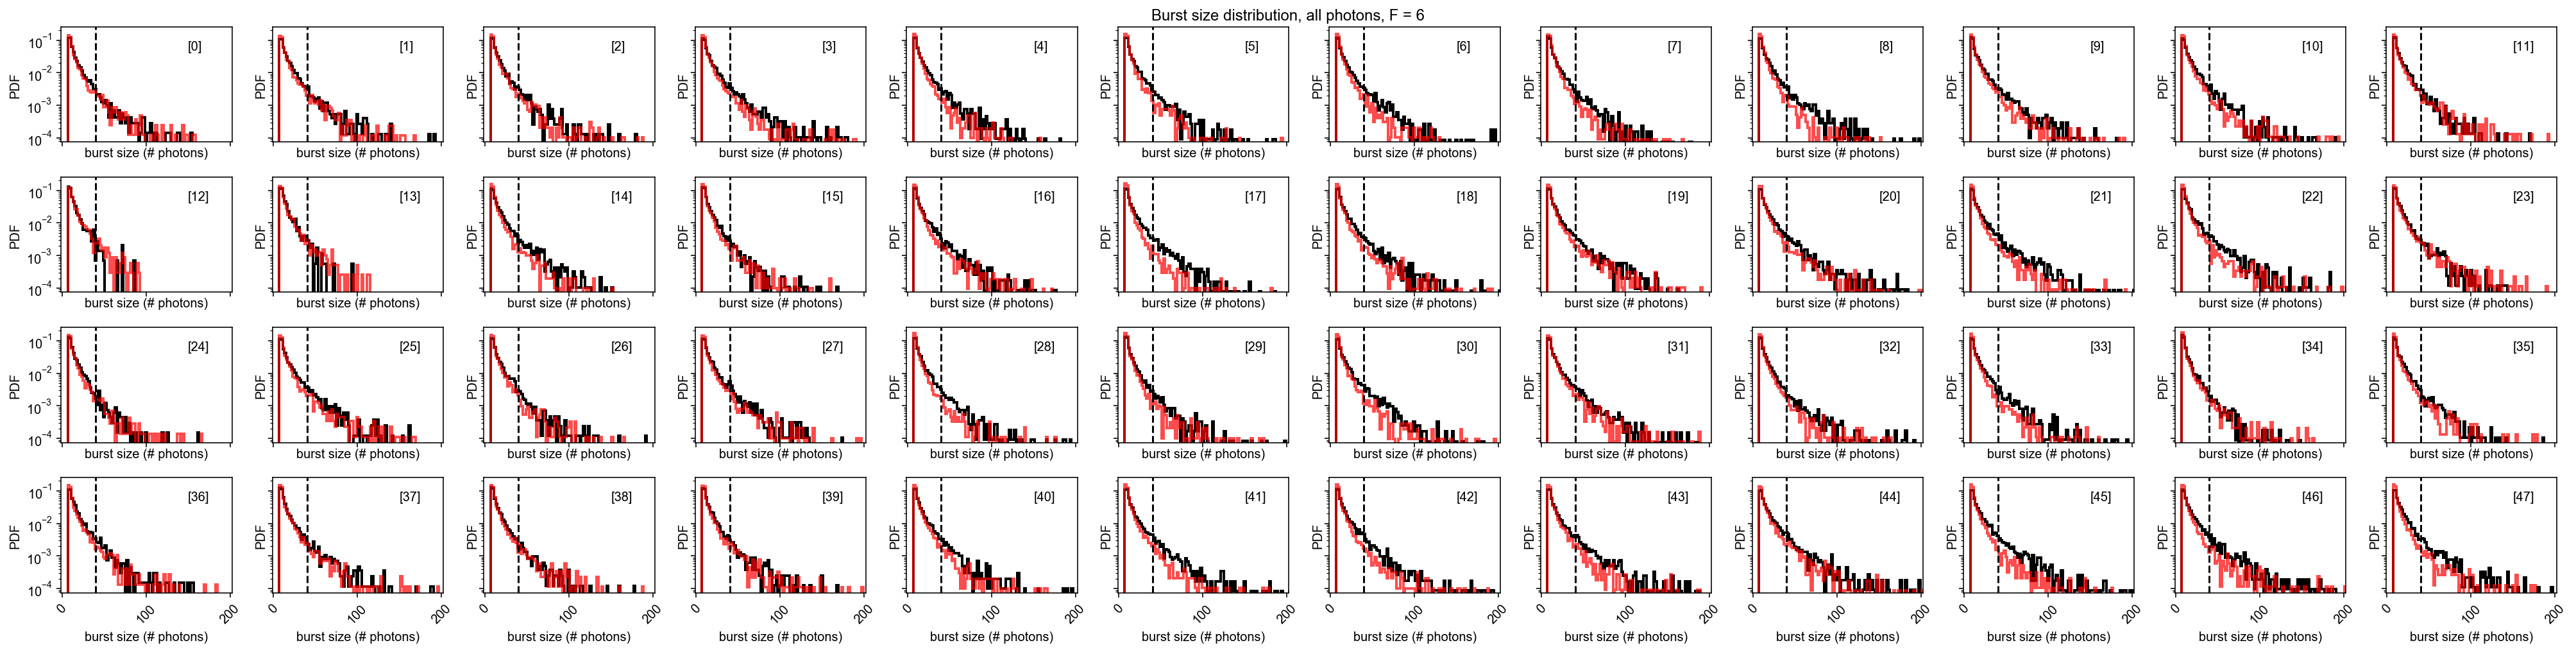

In [23]:
nrows = 4
ncols = 12
figsize = (1.5 * ncols + 10, 1.5 * nrows + 1)
hist_kws = dict(histtype='step', lw=2)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True, figsize=figsize)
axes_list = [item for sublist in axes for item in sublist] 

th = 40
xrotation = 45
column = 'nt'
for spot, group in bursts_all.groupby('spot'):
    ax = axes_list[spot]
    size0 = group.loc[mask_noflow & mask_F6, column]
    size1 = group.loc[mask_flow & mask_F6, column]
    bins = np.arange(-1, size0.max(), 2)
    ax.hist(size0, bins, density=True, color='k', **hist_kws)
    ax.hist(size1, bins, density=True, color='r', alpha=0.7, **hist_kws)
    ax.set_yscale('log')
    ax.axvline(th, color='k', ls='--')
    ax.set_xlim(-1, size0.quantile(0.99999) + 1)
    ax.set_xlabel('burst size (# photons)')
    ax.set_ylabel('PDF')
    ax.text(150, 0.5e-1, f'[{spot}]')
    #ax.legend(loc='upper right', prop={'size': 8})
    plt.setp(ax.get_xticklabels(), rotation=xrotation)
    #ax.tick_params(axis='both', which='major', left=True)
fig.suptitle(f'Burst size distribution, all photons, F = 6', x=0.5,y=1.0)
#plt.legend(sample_description0, sample_description1)
plt.tight_layout()
#plt.savefig('burst_size_PDF_nt_F6_48_spots.png', dpi=1200);

## Constant threshold burst search

Due to differences in the incident power between measurements, two burst searches using a constant threshold were performed and compared:
1. 50kcps (no flow) 
2. 75kcps (Streets chip with flow)

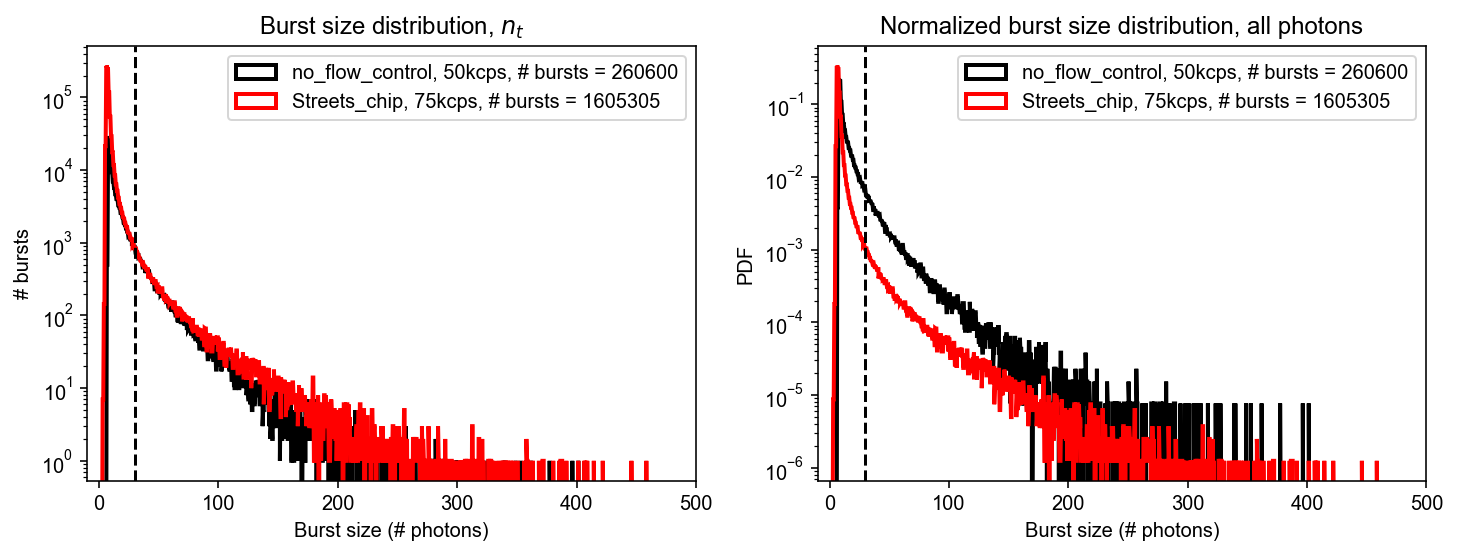

In [24]:
th1 = 30
column = 'nt'
binwidth = 0.5
hist_kws = dict(histtype='step', lw=2)

fig, ax = plt.subplots(1, 2, figsize=(12, 4), sharex=True)
size0 = bursts_all.loc[mask_noflow & mask_50kcps, column]
size1 = bursts_all.loc[mask_flow & mask_75kcps, column]
bins = np.arange(-1, size0.max(), binwidth)
#bin1 = np.arange(-1, size1.max(), binwidth)

ax[0].hist(size0, label=f'{sample_description_noflow}, 50kcps, # bursts = {num_bursts_list[1]}', color='k', bins=bins, **hist_kws)
ax[0].hist(size1, label=f'{sample_description_flow}, 75kcps, # bursts = {num_bursts_list[3]}', color='r', bins=bins, **hist_kws)
ax[0].set_yscale('log')
ax[0].axvline(th1, color='k', ls='--')
ax[0].legend(loc='upper right')
ax[0].set_ylabel('# bursts')
ax[0].set_xlabel('Burst size (# photons)')
ax[0].set_title('Burst size distribution, $n_t$');
ax[0].set_xlim(-10, 500)

th2 = 30
column = 'nt'
size2 = bursts_all.loc[mask_noflow & mask_50kcps, column]
size3 = bursts_all.loc[mask_flow & mask_75kcps, column]
bins = np.arange(-1, size2.max(), binwidth)
#bin1 = np.arange(-1, size3.max(), binwidth)

ax[1].hist(size2, density=True, stacked=True, label=f'{sample_description_noflow}, 50kcps, # bursts = {num_bursts_list[1]}',  
           color='k', bins=bins, range=(0,500), **hist_kws)
ax[1].hist(size3, density=True, stacked=True, label=f'{sample_description_flow}, 75kcps, # bursts = {num_bursts_list[3]}', 
           color='r', bins=bins, range=(0,500), **hist_kws)
ax[1].set_yscale('log')
ax[1].axvline(th2, color='k', ls='--')
ax[1].legend(loc='upper right')
ax[1].set_ylabel('PDF')
ax[1].set_xlabel('Burst size (# photons)')
ax[1].set_title('Normalized burst size distribution, all photons');
ax[1].set_xlim(-10, 500);

#plt.savefig('burst_size_distribution_vs_PDF_50kcps_75kcps.png', dpi=1200)

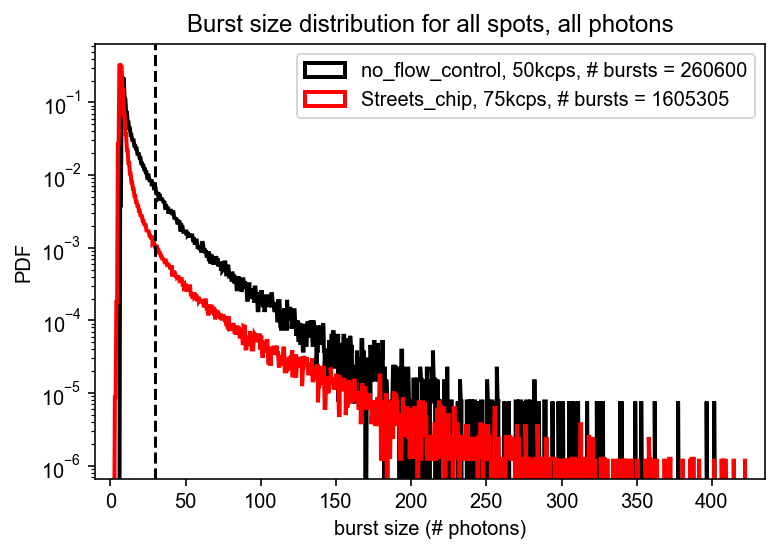

In [25]:
th = 30
column = 'nt'
binwidth = 0.5
hist_kws = dict(histtype='step', lw=2)

plt.figure()
size0 = bursts_all.loc[mask_noflow & mask_50kcps, column]
size1 = bursts_all.loc[mask_flow & mask_75kcps, column]
bins = np.arange(-1, size0.max(), binwidth)
#bins = np.arange(-1, size1.max(), binwidth)

plt.hist(size0, density=True, label=f'{sample_description_noflow}, 50kcps, # bursts = {num_bursts_list[1]}', 
         color='k', bins=bins, **hist_kws)
plt.hist(size1, density=True, label=f'{sample_description_flow}, 75kcps, # bursts = {num_bursts_list[3]}', 
         color='r', bins=bins, **hist_kws)
plt.xlim(-10, size0.quantile(0.99999) + 50)
plt.axvline(th, color='k', ls='--')
plt.legend(loc='upper right')
plt.yscale('log')
plt.ylabel('PDF')
plt.xlabel('burst size (# photons)')
plt.title(f'Burst size distribution for all spots, all photons');
#plt.savefig('burst_size_PDF_nt_50kcps_75kcps.png', dpi=1200)

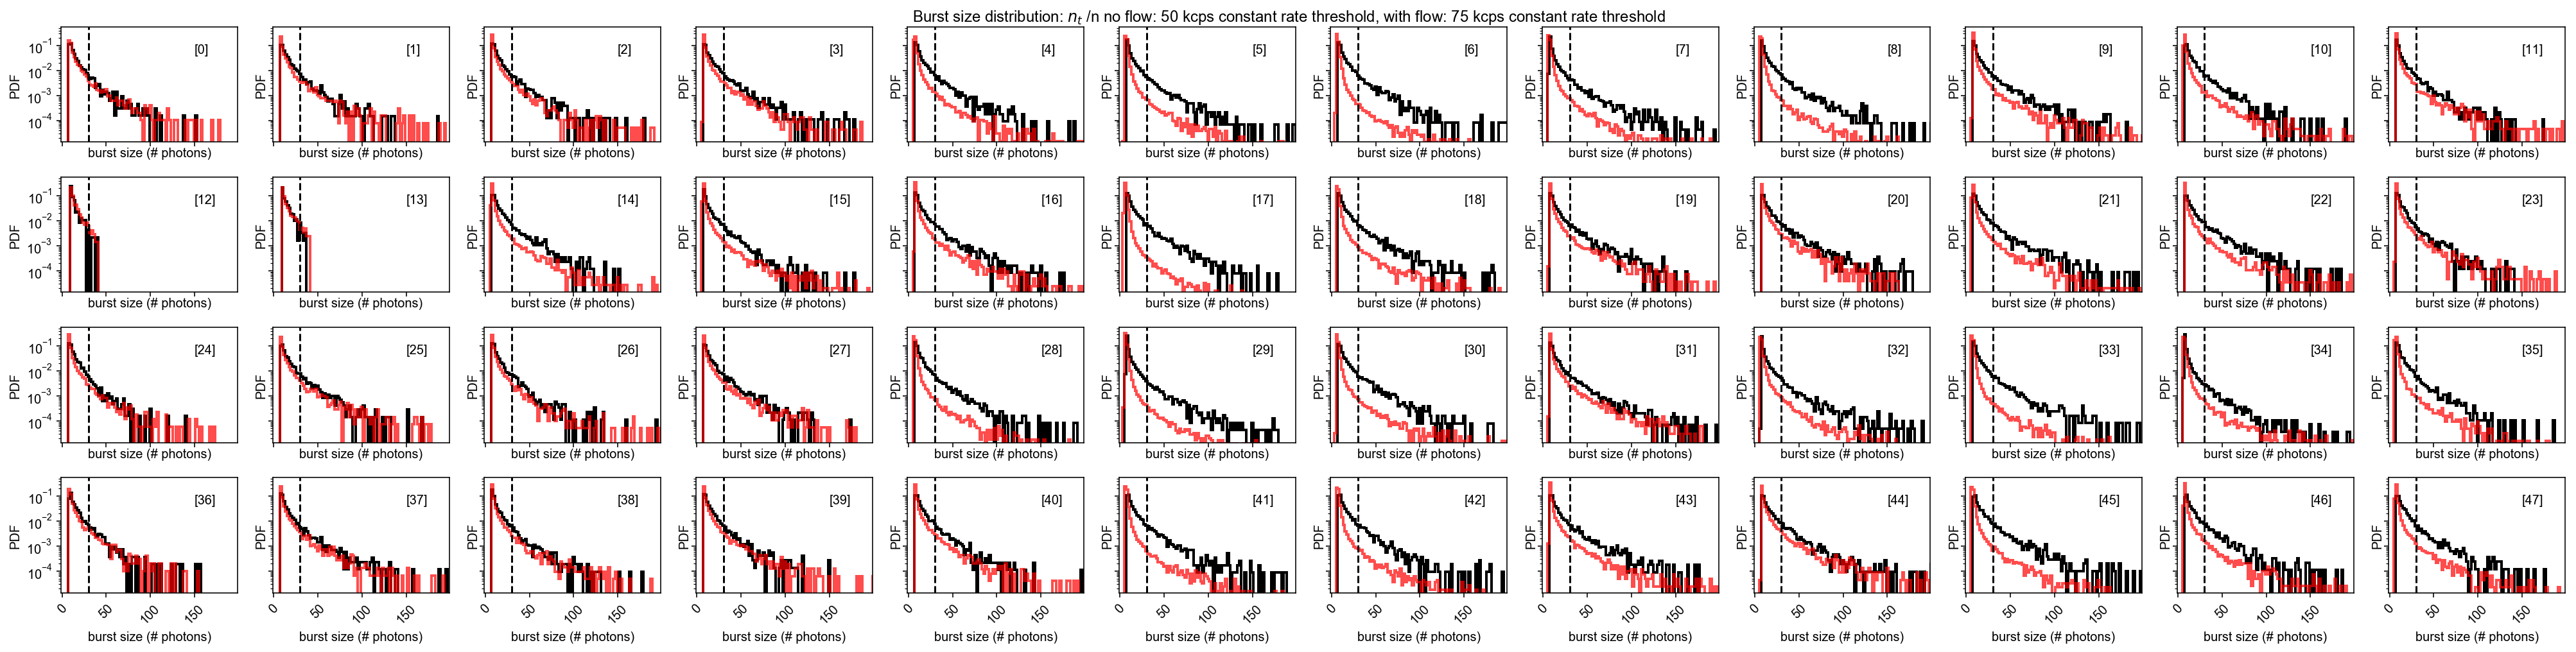

In [26]:
nrows = 4
ncols = 12
figsize = (1.5 * ncols + 10, 1.5 * nrows + 1)
hist_kws = dict(histtype='step', lw=2)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True, figsize=figsize)
axes_list = [item for sublist in axes for item in sublist] 

th = 30
xrotation = 45
column = 'nt'
for spot, group in bursts_all.groupby('spot'):
    ax = axes_list[spot]
    size0 = group.loc[mask_noflow & mask_50kcps, column]
    size1 = group.loc[mask_flow & mask_75kcps, column]
    bins = np.arange(-1, size0.max(), 2)
    ax.hist(size0, bins, density=True, color='k', **hist_kws)
    ax.hist(size1, bins, density=True, color='r', alpha=0.7, **hist_kws)
    ax.set_yscale('log')
    ax.axvline(th, color='k', ls='--')
    ax.set_xlim(-1, size0.quantile(0.99999) + 1)
    ax.set_xlabel('burst size (# photons)')
    ax.set_ylabel('PDF')
    ax.text(150, 0.5e-1, f'[{spot}]')
    #ax.legend(loc='upper right', prop={'size': 8})
    plt.setp(ax.get_xticklabels(), rotation=xrotation)
    #ax.tick_params(axis='both', which='major', left=True)
fig.suptitle(f'Burst size distribution: $n_t$ /n no flow: 50 kcps constant rate threshold, with flow: 75 kcps constant rate threshold', x=0.5,y=1.0)
#plt.legend(sample_description0, sample_description1)
plt.tight_layout()
#plt.savefig('burst_size_PDF_nt_50kcps_75kcps_48_spots.png', dpi=1200);

# Burst duration  distribution

## F = 6 burst search

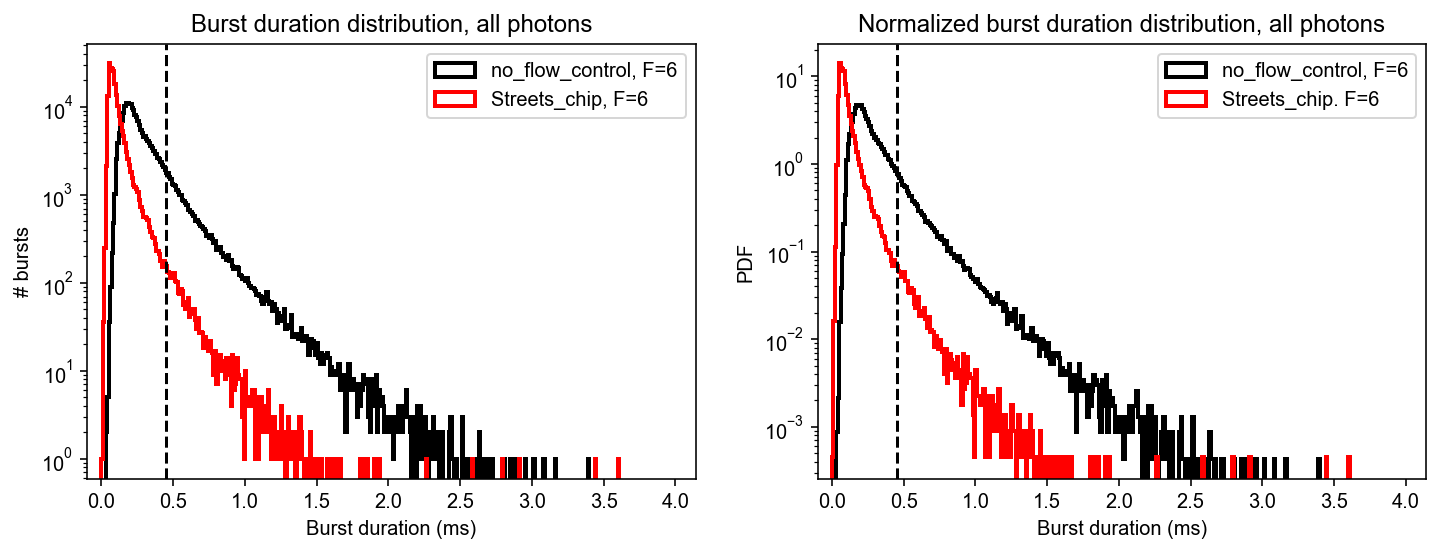

In [27]:
th1 = 0.45
column = 'width_ms'
binwidth = 0.01
hist_kws = dict(histtype='step', lw=2)

fig, ax = plt.subplots(1, 2, figsize=(12, 4), sharex=True)
width0 = bursts_all.loc[mask_noflow & mask_F6, column]
width1 = bursts_all.loc[mask_flow & mask_F6, column]
bins = np.arange(-1, width0.max(), binwidth)
#bin1 = np.arange(-1, width1.max(), binwidth)

ax[0].hist(width0, label=f'{sample_description_noflow}, F=6', color='k', bins=bins, **hist_kws)
ax[0].hist(width1, label=f'{sample_description_flow}, F=6', color='r', bins=bins, **hist_kws)
ax[0].set_yscale('log')
ax[0].axvline(th1, color='k', ls='--')
ax[0].legend(loc='upper right')
ax[0].set_ylabel('# bursts')
ax[0].set_xlabel('Burst duration (ms)')
ax[0].set_title('Burst duration distribution, all photons');
ax[0].set_xlim(-.1, width0.quantile(0.99999) + 1)

width2 = bursts_all.loc[mask_noflow & mask_F6, column]
width3 = bursts_all.loc[mask_flow & mask_F6, column]
bins = np.arange(-1, width2.max(), binwidth)
#bin1 = np.arange(-1, width3.max(), binwidth)

ax[1].hist(width2, density=True, stacked=True, label=f'{sample_description_noflow}, F=6', 
           color='k', bins=bins, range=(0,500), **hist_kws)
ax[1].hist(width3, density=True, stacked=True, label=f'{sample_description_flow}. F=6', 
           color='r', bins=bins, range=(0,500), **hist_kws)
ax[1].set_yscale('log')
ax[1].axvline(th1, color='k', ls='--')
ax[1].legend(loc='upper right')
ax[1].set_ylabel('PDF')
ax[1].set_xlabel('Burst duration (ms)')
ax[1].set_title('Normalized burst duration distribution, all photons');
ax[1].set_xlim(-.1, width0.quantile(0.99999) + 1);

#plt.savefig('burst_width_distribution_vs_PDF_semilog_F=6.png', dpi=1200)

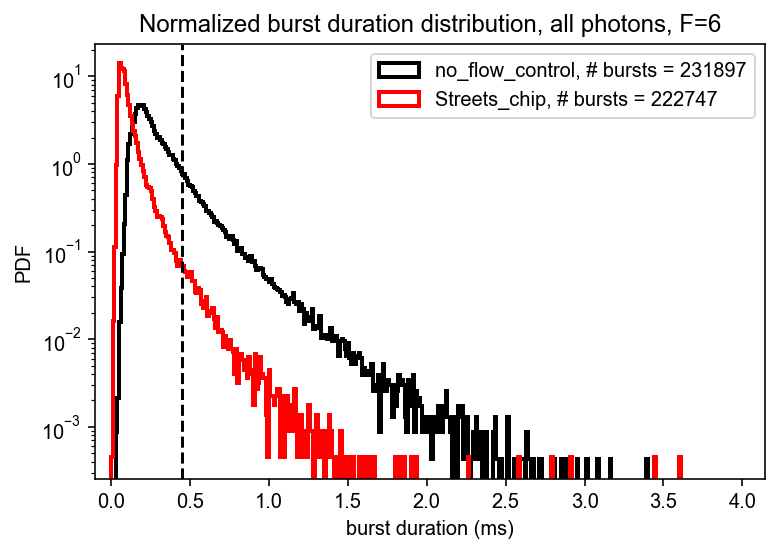

In [28]:
width_th = 0.45
column = 'width_ms'
binwidth = 0.01
hist_kws = dict(histtype='step', lw=2)

plt.figure()
width0 = bursts_all.loc[mask_noflow & mask_F6, column]
width1 = bursts_all.loc[mask_flow & mask_F6, column]
bins = np.arange(-1, width0.max(), binwidth)
#bin1 = np.arange(-1, width1.max(), binwidth)

plt.hist(width0, density=True, label=f'{sample_description_noflow}, # bursts = {num_bursts_list[0]}', color='k', bins=bins, **hist_kws)
plt.hist(width1, density=True, label=f'{sample_description_flow}, # bursts = {num_bursts_list[2]}', color='r', bins=bins, **hist_kws)

plt.axvline(width_th, color='k', ls='--')
plt.legend(loc='upper right')
plt.yscale('log')
plt.ylabel('PDF')
plt.xlabel('burst duration (ms)')
plt.title(f'Normalized burst duration distribution, all photons, F=6');
plt.xlim(-.1, width0.quantile(0.99999) + 1);
#plt.savefig('burst_duration_PDF_nt_F=6.png', dpi=1200);

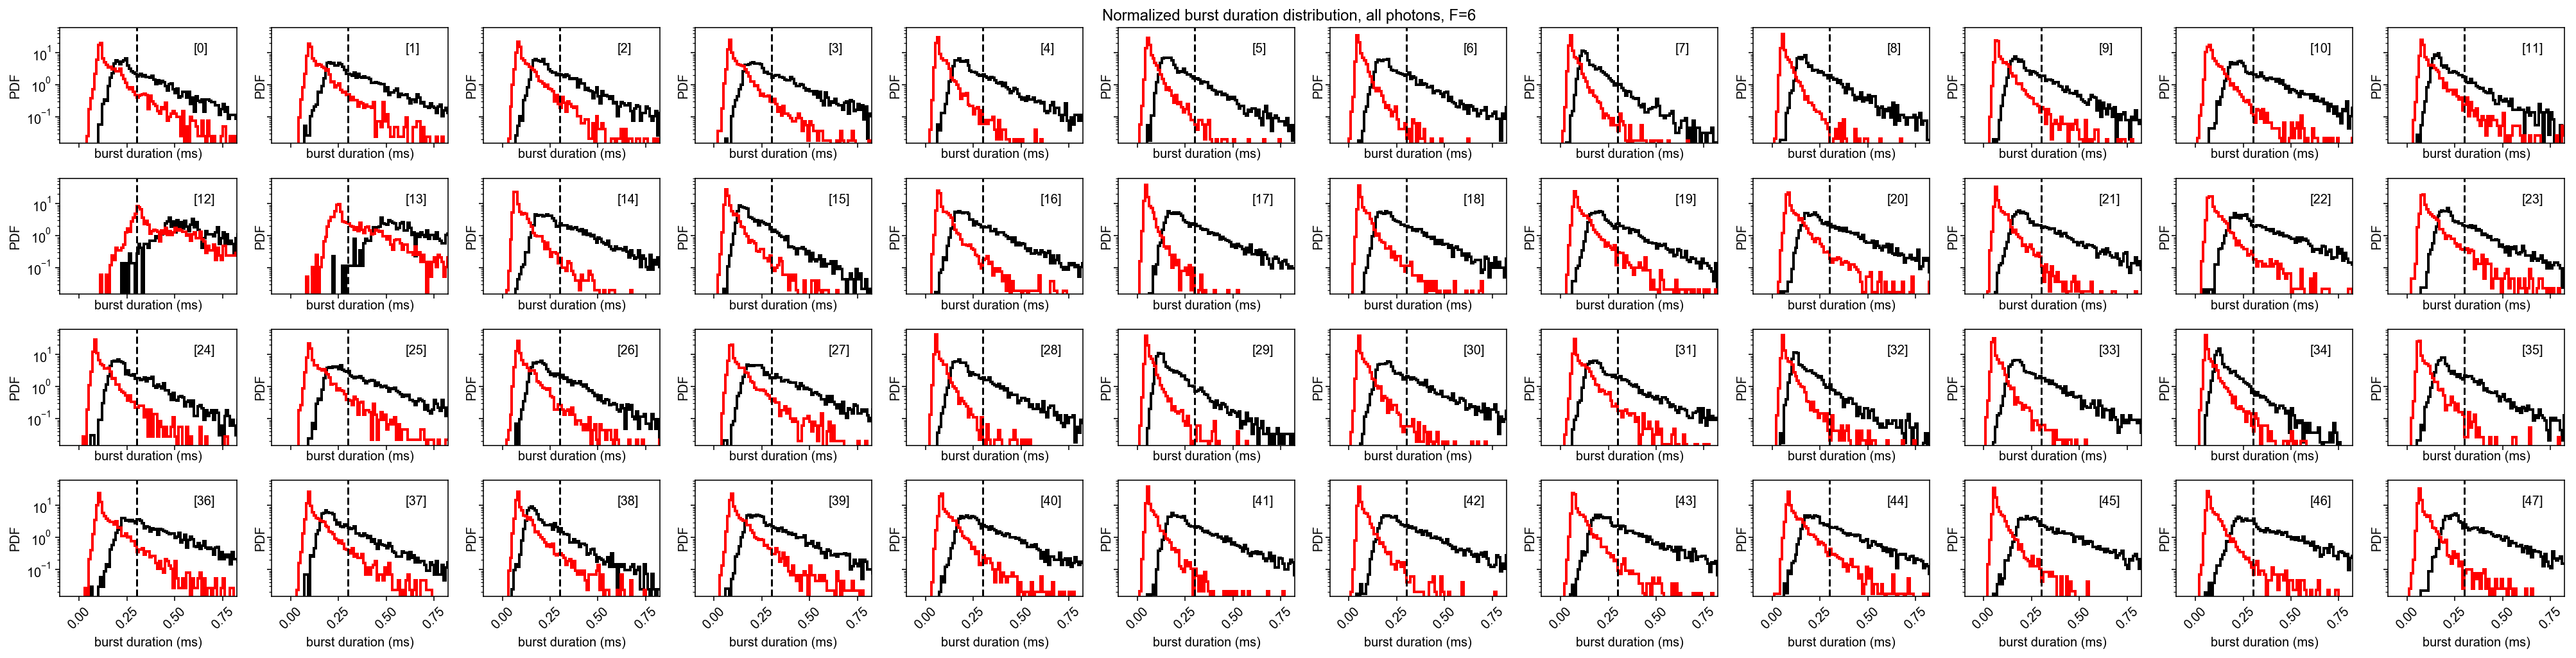

In [29]:
nrows = 4
ncols = 12
figsize = (1.5 * ncols + 10, 1.5 * nrows + 1)
xrotation = 45

binwidth = 0.01
width_th = 0.3
column = 'width_ms'
hist_kws = dict(histtype='step', lw=2)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True, figsize=figsize)
axes_list = [item for sublist in axes for item in sublist] 

for spot, group in bursts_all.groupby('spot'):
    ax = axes_list[spot]
    width0 = group.loc[mask_noflow & mask_F6, column]
    width1 = group.loc[mask_flow & mask_F6, column]
    #bins0 = np.arange(-1, width0.max(), binwidth)
    bins = np.arange(-1, width0.max(), binwidth)
    ax.hist(width0, bins, density=True, color='k', **hist_kws)
    ax.hist(width1, bins, density=True, color='r', **hist_kws)
    ax.set_yscale('log')
    ax.axvline(width_th, color='k', ls='--')
    ax.set_xlim(-.1, width1.quantile(0.99999))
    ax.set_xlabel('burst duration (ms)')
    ax.set_ylabel('PDF')
    ax.text(0.6, 1e1, f'[{spot}]')
    #ax.legend(loc='upper right', prop={'size': 8})
    plt.setp(ax.get_xticklabels(), rotation=xrotation)
fig.suptitle(f'Normalized burst duration distribution, all photons, F=6', x=0.5,y=1.0)
plt.tight_layout()
#plt.savefig('burst_duration_PDF_nt_48_spots.png', dpi=1200);

## Constant threshold burst search 
1. 50kcps (no flow)
2. 75kcps (Streets chips with flow)

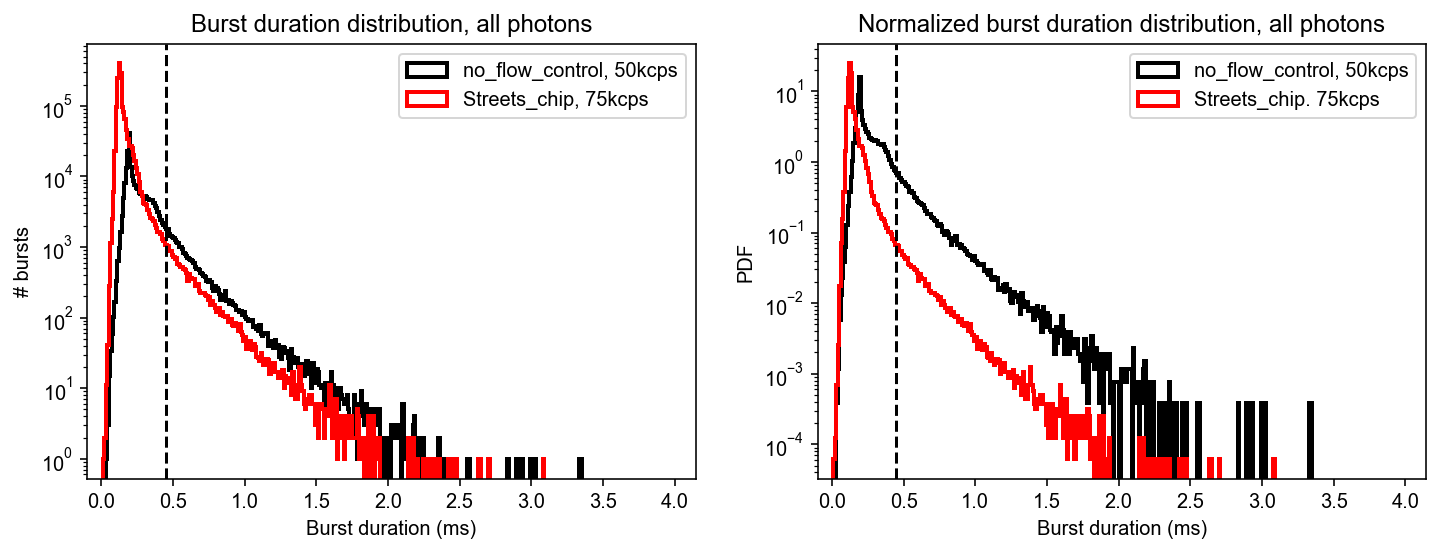

In [30]:
th1 = 0.45
column = 'width_ms'
binwidth = 0.01
hist_kws = dict(histtype='step', lw=2)

fig, ax = plt.subplots(1, 2, figsize=(12, 4), sharex=True)
width0 = bursts_all.loc[mask_noflow & mask_50kcps, column]
width1 = bursts_all.loc[mask_flow & mask_75kcps, column]
bins = np.arange(-1, width0.max(), binwidth)
#bin1 = np.arange(-1, width1.max(), binwidth)

ax[0].hist(width0, label=f'{sample_description_noflow}, 50kcps', color='k', bins=bins, **hist_kws)
ax[0].hist(width1, label=f'{sample_description_flow}, 75kcps', color='r', bins=bins, **hist_kws)
ax[0].set_yscale('log')
ax[0].axvline(th1, color='k', ls='--')
ax[0].legend(loc='upper right')
ax[0].set_ylabel('# bursts')
ax[0].set_xlabel('Burst duration (ms)')
ax[0].set_title('Burst duration distribution, all photons');
ax[0].set_xlim(-.1, width0.quantile(0.99999) + 1)

width2 = bursts_all.loc[mask_noflow & mask_50kcps, column]
width3 = bursts_all.loc[mask_flow & mask_75kcps, column]
bins = np.arange(-1, width2.max(), binwidth)
#bin1 = np.arange(-1, width3.max(), binwidth)

ax[1].hist(width2, density=True, stacked=True, label=f'{sample_description_noflow}, 50kcps', 
           color='k', bins=bins, range=(0,500), **hist_kws)
ax[1].hist(width3, density=True, stacked=True, label=f'{sample_description_flow}. 75kcps', 
           color='r', bins=bins, range=(0,500), **hist_kws)
ax[1].set_yscale('log')
ax[1].axvline(th1, color='k', ls='--')
ax[1].legend(loc='upper right')
ax[1].set_ylabel('PDF')
ax[1].set_xlabel('Burst duration (ms)')
ax[1].set_title('Normalized burst duration distribution, all photons');
ax[1].set_xlim(-.1, width0.quantile(0.99999) + 1);

#plt.savefig('burst_width_distribution_vs_PDF_50kcps_75kcps.png', dpi=1200)

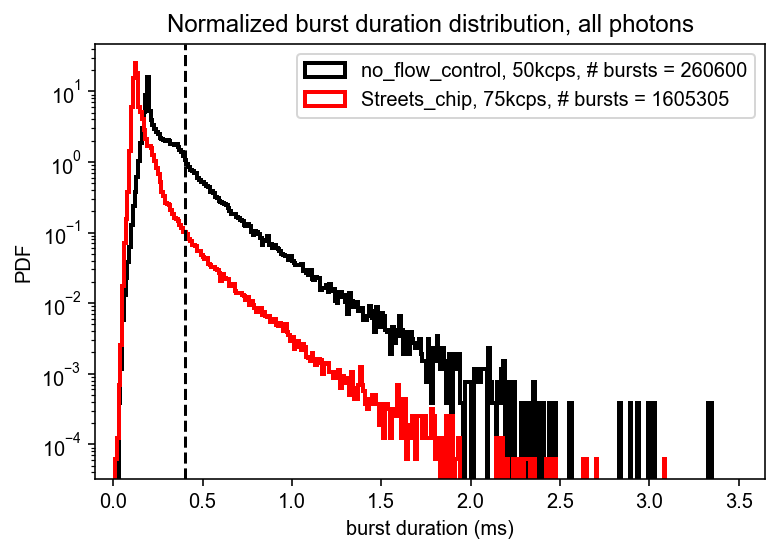

In [31]:
width_th = 0.4
column = 'width_ms'
binwidth = 0.01
hist_kws = dict(histtype='step', lw=2)

plt.figure()
width0 = bursts_all.loc[mask_noflow & mask_50kcps, column]
width1 = bursts_all.loc[mask_flow & mask_75kcps, column]
bins = np.arange(-1, width0.max(), binwidth)
#bin1 = np.arange(-1, width1.max(), binwidth)

plt.hist(width0, density=True, label=f'{sample_description_noflow}, 50kcps, # bursts = {num_bursts_list[1]}', color='k', bins=bins, **hist_kws)
plt.hist(width1, density=True, label=f'{sample_description_flow}, 75kcps, # bursts = {num_bursts_list[3]}', color='r', bins=bins, **hist_kws)

plt.axvline(width_th, color='k', ls='--')
plt.legend(loc='upper right')
plt.yscale('log')
plt.ylabel('PDF')
plt.xlabel('burst duration (ms)')
plt.title(f'Normalized burst duration distribution, all photons');
plt.xlim(-.1, width0.quantile(0.99999) + 0.5);
#plt.savefig('burst_duration_PDF_nt_50kcps_75kcps.png', dpi=1200);

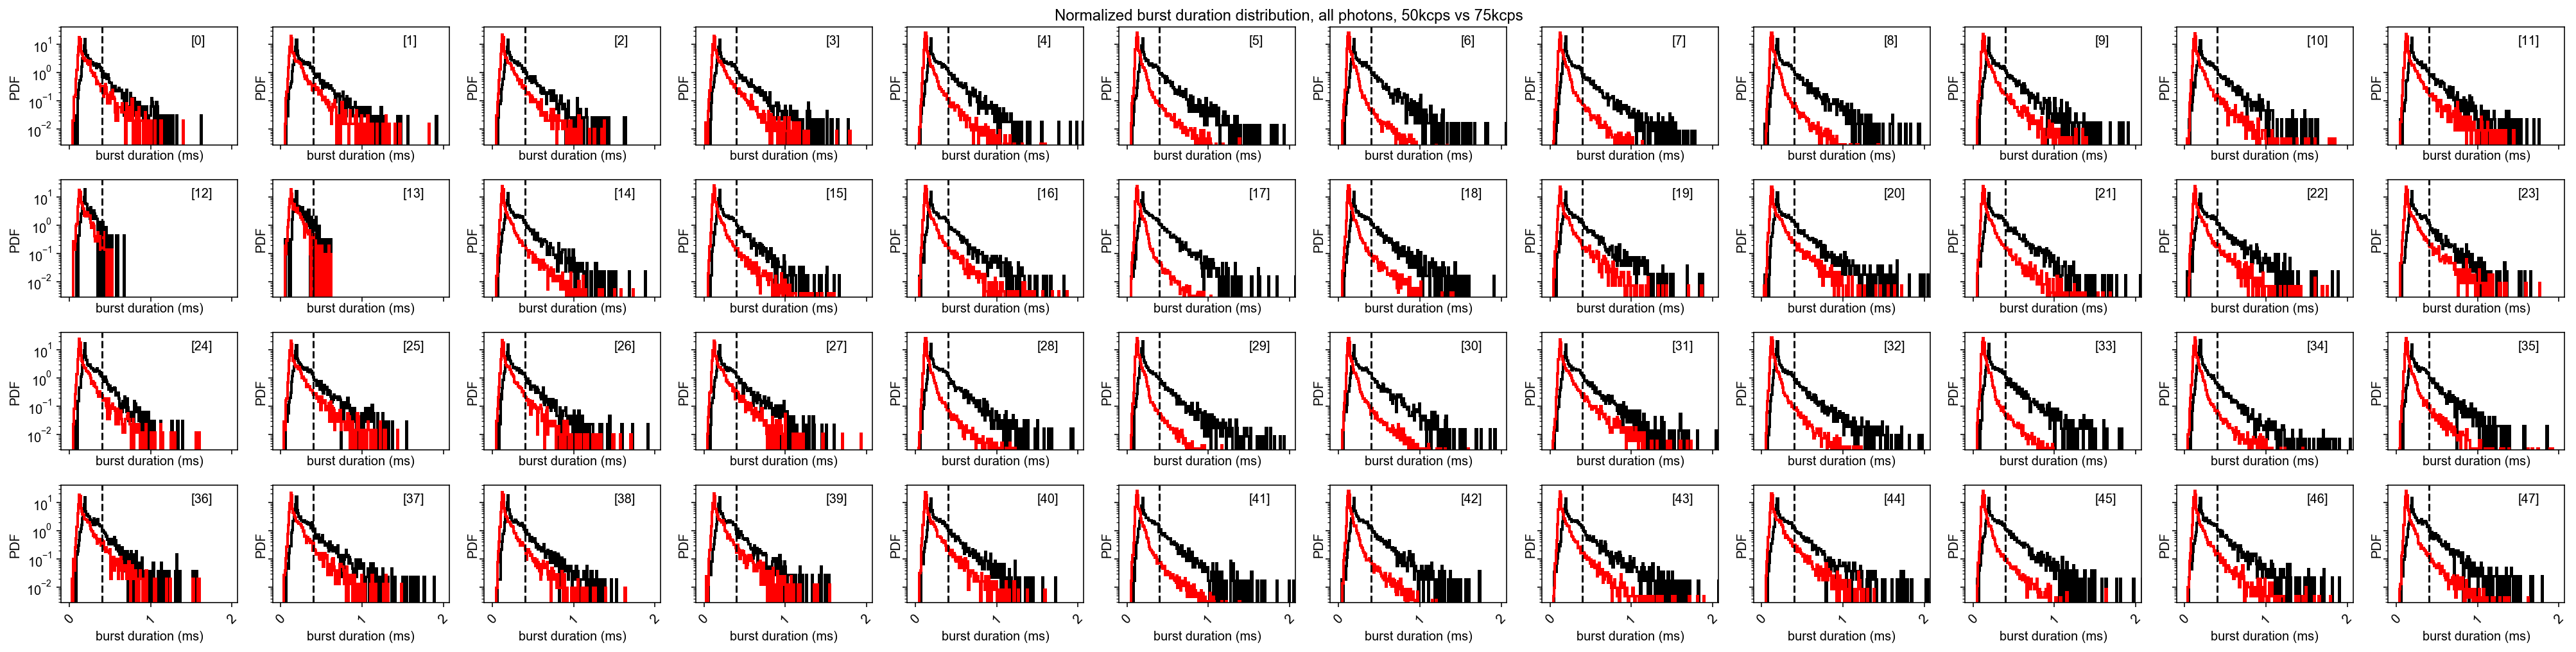

In [32]:
nrows = 4
ncols = 12
figsize = (1.5 * ncols + 10, 1.5 * nrows + 1)
xrotation = 45

binwidth = 0.01
width_th = 0.4
column = 'width_ms'
hist_kws = dict(histtype='step', lw=2)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True, figsize=figsize)
axes_list = [item for sublist in axes for item in sublist] 

for spot, group in bursts_all.groupby('spot'):
    ax = axes_list[spot]
    width0 = group.loc[mask_noflow & mask_50kcps, column]
    width1 = group.loc[mask_flow & mask_75kcps, column]
    #bins0 = np.arange(-1, width0.max(), binwidth)
    bins = np.arange(-1, width0.max(), binwidth)
    ax.hist(width0, bins, density=True, color='k', **hist_kws)
    ax.hist(width1, bins, density=True, color='r', **hist_kws)
    ax.set_yscale('log')
    ax.axvline(width_th, color='k', ls='--')
    ax.set_xlim(-.1, width1.quantile(0.99999)+ 0.5)
    ax.set_xlabel('burst duration (ms)')
    ax.set_ylabel('PDF')
    ax.text(1.5, 1e1, f'[{spot}]')
    #ax.legend(loc='upper right', prop={'size': 8})
    plt.setp(ax.get_xticklabels(), rotation=xrotation)
fig.suptitle(f'Normalized burst duration distribution, all photons, 50kcps vs 75kcps', x=0.5,y=1.0)
plt.tight_layout()
#plt.savefig('burst_duration_PDF_nt_50kcps_75kcps_48_spots.png', dpi=1200);

# Peak photon rate distribution

## F = 6 burst search

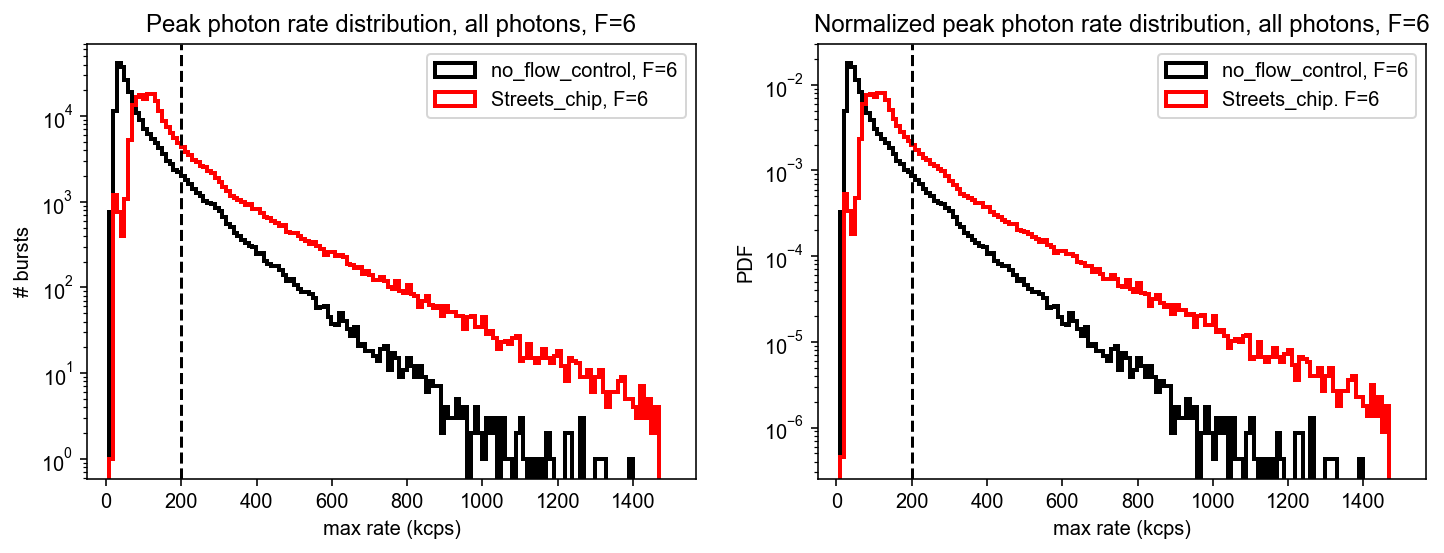

In [33]:
rate_th = 200
column = 'max_rate'
binwidth = 10
hist_kws = dict(histtype='step', lw=2)

fig, ax = plt.subplots(1, 2, figsize=(12, 4), sharex=True)
rate0 = bursts_all.loc[mask_noflow & mask_F6, column]*1e-3
rate1 = bursts_all.loc[mask_flow & mask_F6, column]*1e-3
bins = np.arange(-1, rate0.max(), binwidth)
#bin1 = np.arange(-1, rate1.max(), binwidth)

ax[0].hist(rate0, label=f'{sample_description_noflow}, F=6', color='k', bins=bins, **hist_kws)
ax[0].hist(rate1, label=f'{sample_description_flow}, F=6', color='r', bins=bins, **hist_kws)
ax[0].set_yscale('log')
ax[0].axvline(rate_th, color='k', ls='--')
ax[0].legend(loc='upper right')
ax[0].set_ylabel('# bursts')
ax[0].set_xlabel('max rate (kcps)')
ax[0].set_title('Peak photon rate distribution, all photons, F=6');
ax[0].set_xlim(50, rate0.quantile(0.99999) + 250)

rate2 = bursts_all.loc[mask_noflow & mask_F6, column]*1e-3
rate3 = bursts_all.loc[mask_flow & mask_F6, column]*1e-3
bins = np.arange(-1, rate2.max(), binwidth)
#bin1 = np.arange(-1, rate3.max(), binwidth)

ax[1].hist(rate2, density=True, label=f'{sample_description_noflow}, F=6', 
           color='k', bins=bins, range=(0,500), **hist_kws)
ax[1].hist(rate3, density=True, label=f'{sample_description_flow}. F=6', 
           color='r', bins=bins, range=(0,500), **hist_kws)
ax[1].set_yscale('log')
ax[1].axvline(rate_th, color='k', ls='--')
ax[1].legend(loc='upper right')
ax[1].set_ylabel('PDF')
ax[1].set_xlabel('max rate (kcps)')
ax[1].set_title('Normalized peak photon rate distribution, all photons, F=6');
ax[1].set_xlim(-50, rate0.quantile(0.99999) + 250);
#plt.savefig('peak_photon_rate_distribution_vs_PDF_nt_F=6.png', dpi=1200);

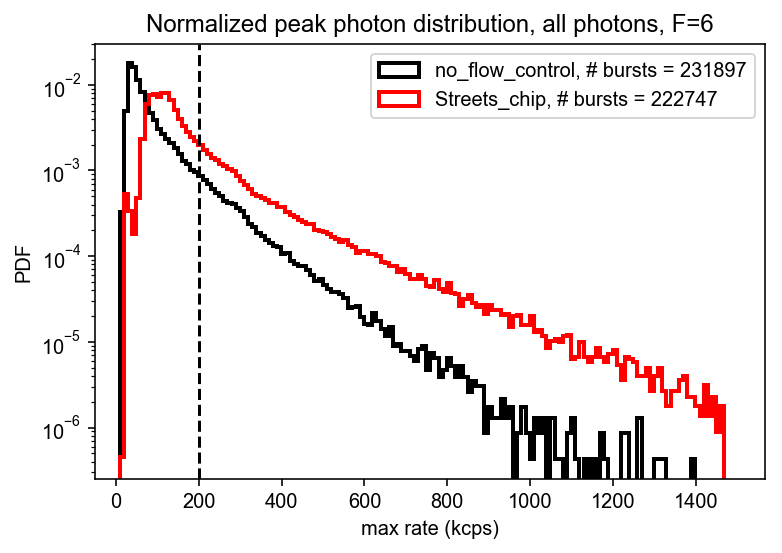

In [34]:
rate_th = 200
column = 'max_rate'
binwidth = 10
hist_kws = dict(histtype='step', lw=2)

plt.figure()
rate0 = bursts_all.loc[mask_noflow & mask_F6, column]*1e-3
rate1 = bursts_all.loc[mask_flow & mask_F6, column]*1e-3
bins = np.arange(-1, rate0.max(), binwidth)
#bin1 = np.arange(-1, rate1.max(), binwidth)

plt.hist(rate0, density=True, label=f'{sample_description_noflow}, # bursts = {num_bursts_list[0]}', color='k', bins=bins, **hist_kws)
plt.hist(rate1, density=True, label=f'{sample_description_flow}, # bursts = {num_bursts_list[2]}', color='r', bins=bins, **hist_kws)

plt.axvline(rate_th, color='k', ls='--')
plt.legend(loc='upper right')
plt.yscale('log')
plt.ylabel('PDF')
plt.xlabel('max rate (kcps)')
plt.title(f'Normalized peak photon distribution, all photons, F=6');
plt.xlim(-50, rate0.quantile(0.99999) + 250);
#plt.savefig('peak_photon_rate_PDF_nt_F=6.png', dpi=1200);

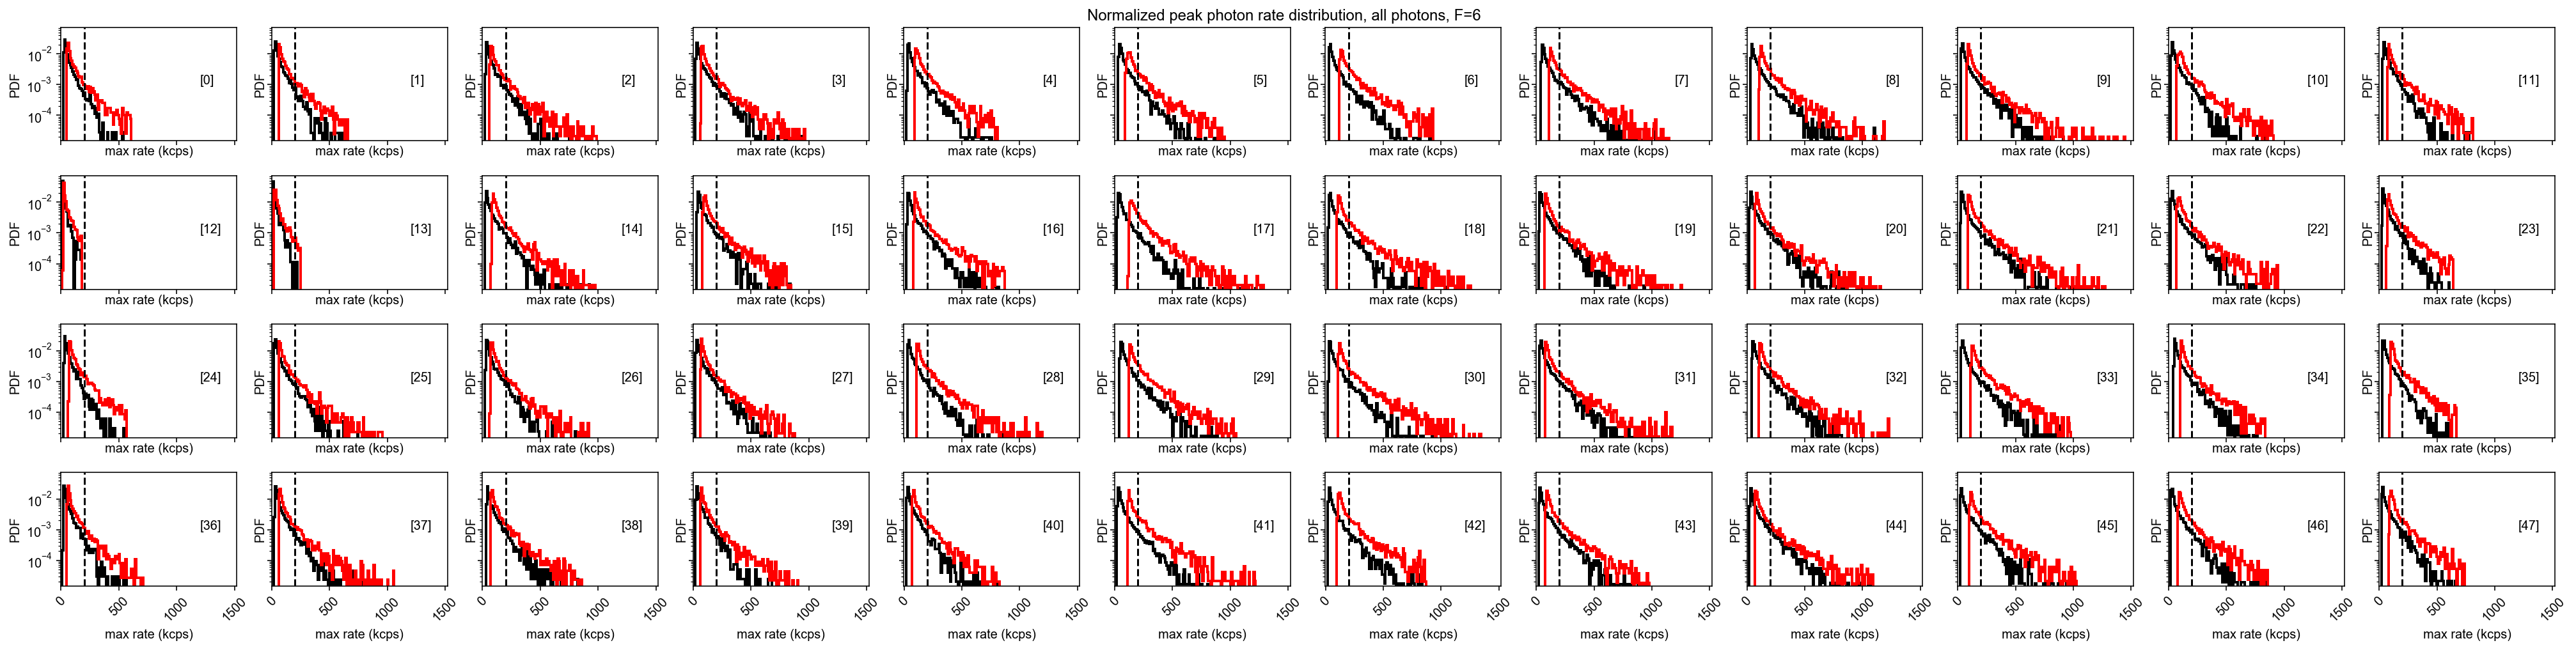

In [35]:
nrows = 4
ncols = 12
figsize = (1.5 * ncols + 10, 1.5 * nrows + 1)
xrotation = 45

rate_th = 200
column = 'max_rate'
binwidth = 10
hist_kws = dict(histtype='step', lw=2)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True, figsize=figsize)
axes_list = [item for sublist in axes for item in sublist] 

for spot, group in bursts_all.groupby('spot'):
    ax = axes_list[spot]
    rate0 = group.loc[mask_noflow & mask_F6, column]*1e-3
    rate1 = group.loc[mask_flow & mask_F6, column]*1e-3
    #bins0 = np.arange(-1, rate0.max(), binwidth)
    bins = np.arange(-1, rate0.max(), binwidth)
    ax.hist(rate0, bins, density=True, color='k', **hist_kws)
    ax.hist(rate1, bins, density=True, color='r', **hist_kws)
    ax.set_yscale('log')
    ax.axvline(rate_th, color='k', ls='--')
    ax.set_xlim(-.50, rate1.quantile(0.99999) +250)
    ax.set_xlabel('max rate (kcps)')
    ax.set_ylabel('PDF')
    ax.text(1200, 1e-3, f'[{spot}]')
    #ax.legend(loc='upper right', prop={'size': 8})
    plt.setp(ax.get_xticklabels(), rotation=xrotation)
fig.suptitle(f'Normalized peak photon rate distribution, all photons, F=6', x=0.5,y=1.0)
plt.tight_layout()
#plt.savefig('peak_photon_rate_PDF_nt_48_spots.png', dpi=1200);

## Constant threshold burst search 
1. 50kcps (no flow)
2. 75kcps (Streets chips with flow)

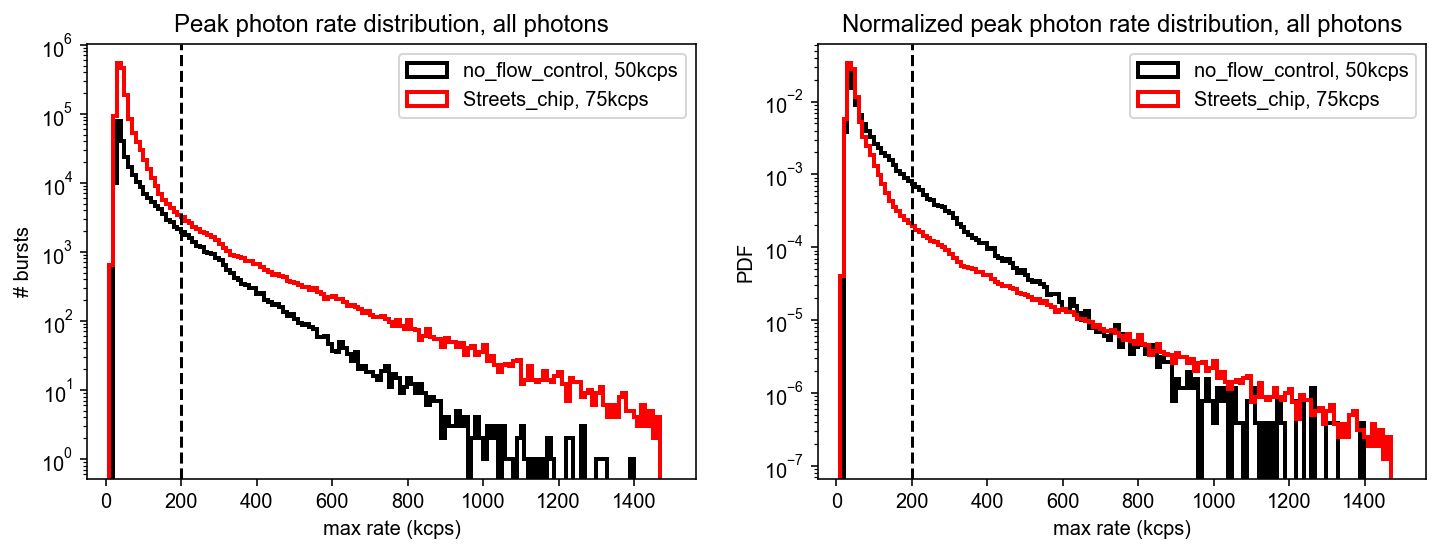

In [36]:
rate_th = 200
column = 'max_rate'
binwidth = 10
hist_kws = dict(histtype='step', lw=2)

fig, ax = plt.subplots(1, 2, figsize=(12, 4), sharex=True)
width0 = bursts_all.loc[mask_noflow & mask_50kcps, column]*1e-3
width1 = bursts_all.loc[mask_flow & mask_75kcps, column]*1e-3
bins = np.arange(-1, width0.max(), binwidth)
#bin1 = np.arange(-1, width1.max(), binwidth)

ax[0].hist(width0, label=f'{sample_description_noflow}, 50kcps', color='k', bins=bins, **hist_kws)
ax[0].hist(width1, label=f'{sample_description_flow}, 75kcps', color='r', bins=bins, **hist_kws)
ax[0].set_yscale('log')
ax[0].axvline(rate_th, color='k', ls='--')
ax[0].legend(loc='upper right')
ax[0].set_ylabel('# bursts')
ax[0].set_xlabel('max rate (kcps)')
ax[0].set_title('Peak photon rate distribution, all photons');
ax[0].set_xlim(-50, width0.quantile(0.99999) + 250)

width2 = bursts_all.loc[mask_noflow & mask_50kcps, column]*1e-3
width3 = bursts_all.loc[mask_flow & mask_75kcps, column]*1e-3
bins = np.arange(-1, width2.max(), binwidth)
#bin1 = np.arange(-1, width3.max(), binwidth)

ax[1].hist(width2, density=True, stacked=True, label=f'{sample_description_noflow}, 50kcps', 
           color='k', bins=bins, range=(0,500), **hist_kws)
ax[1].hist(width3, density=True, stacked=True, label=f'{sample_description_flow}, 75kcps', 
           color='r', bins=bins, range=(0,500), **hist_kws)
ax[1].set_yscale('log')
ax[1].axvline(rate_th, color='k', ls='--')
ax[1].legend(loc='upper right')
ax[1].set_ylabel('PDF')
ax[1].set_xlabel('max rate (kcps)')
ax[1].set_title('Normalized peak photon rate distribution, all photons');
ax[1].set_xlim(-50, width0.quantile(0.99999) + 250);

#plt.savefig('peak_photon_rate_distribution_vs_PDF_50kcps_75kcps.png', dpi=1200)

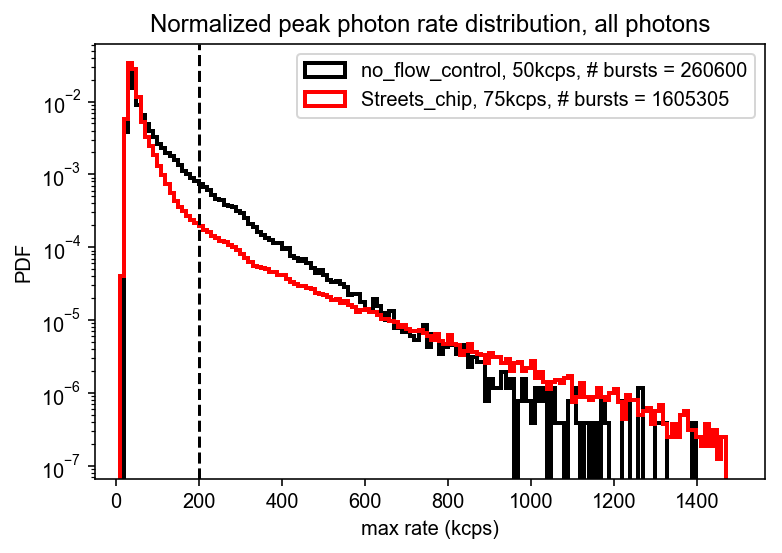

In [37]:
rate_th = 200
column = 'max_rate'
binwidth = 10
hist_kws = dict(histtype='step', lw=2)

plt.figure()
rate0 = bursts_all.loc[mask_noflow & mask_50kcps, column]*1e-3
rate1 = bursts_all.loc[mask_flow & mask_75kcps, column]*1e-3
bins = np.arange(-1, rate0.max(), binwidth)
#bin1 = np.arange(-1, rate1.max(), binwidth)

plt.hist(rate0, density=True, label=f'{sample_description_noflow}, 50kcps, # bursts = {num_bursts_list[1]}', color='k', bins=bins, **hist_kws)
plt.hist(rate1, density=True, label=f'{sample_description_flow}, 75kcps, # bursts = {num_bursts_list[3]}', color='r', bins=bins, **hist_kws)

plt.axvline(rate_th, color='k', ls='--')
plt.legend(loc='upper right')
plt.yscale('log')
plt.ylabel('PDF')
plt.xlabel('max rate (kcps)')
plt.title(f'Normalized peak photon rate distribution, all photons');
plt.xlim(-50, rate0.quantile(0.99999) + 250);
#plt.savefig('peak_photon_rate_PDF_nt_50kcps_75kcps.png', dpi=1200);

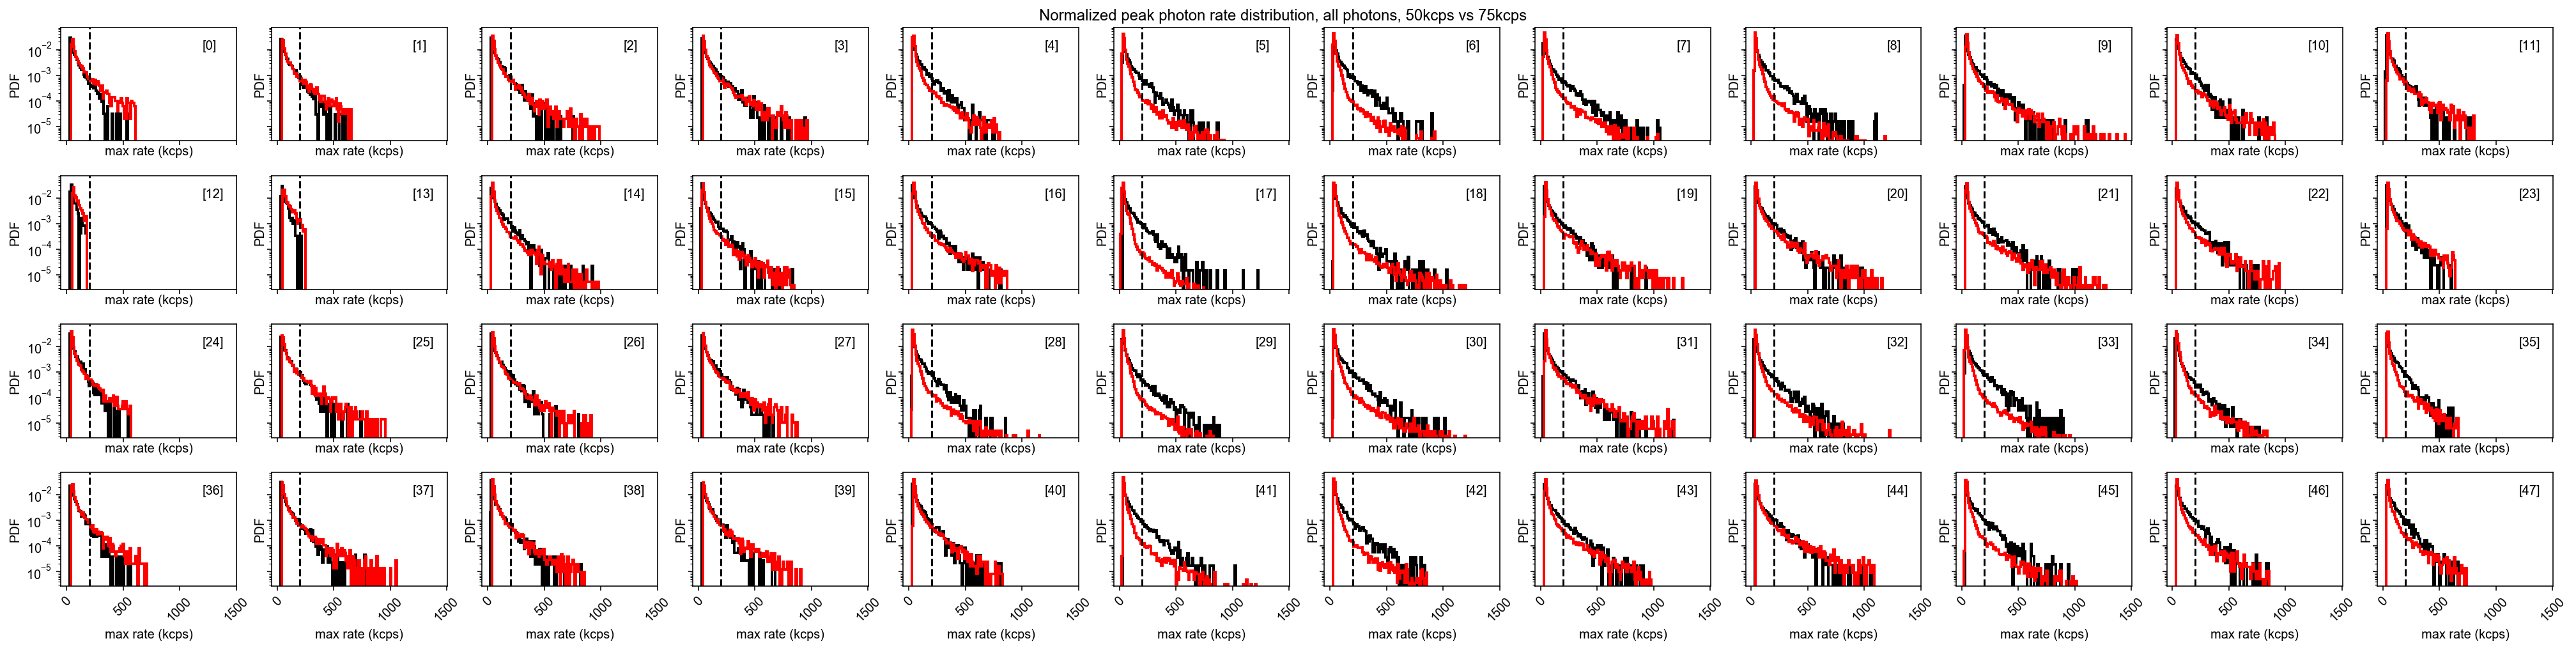

In [38]:
nrows = 4
ncols = 12
figsize = (1.5 * ncols + 10, 1.5 * nrows + 1)
xrotation = 45

rate_th = 200
column = 'max_rate'
binwidth = 10
hist_kws = dict(histtype='step', lw=2)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True, figsize=figsize)
axes_list = [item for sublist in axes for item in sublist] 

for spot, group in bursts_all.groupby('spot'):
    ax = axes_list[spot]
    rate0 = group.loc[mask_noflow & mask_50kcps, column]*1e-3
    rate1 = group.loc[mask_flow & mask_75kcps, column]*1e-3
    #bins0 = np.arange(-1, rate0.max(), binwidth)
    bins = np.arange(-1, rate0.max(), binwidth)
    ax.hist(rate0, bins, density=True, color='k', **hist_kws)
    ax.hist(rate1, bins, density=True, color='r', **hist_kws)
    ax.set_yscale('log')
    ax.axvline(rate_th, color='k', ls='--')
    ax.set_xlim(-50, rate1.quantile(0.99999)+ 250)
    ax.set_xlabel('max rate (kcps)')
    ax.set_ylabel('PDF')
    ax.text(1200, 1e-2, f'[{spot}]')
    #ax.legend(loc='upper right', prop={'size': 8})
    plt.setp(ax.get_xticklabels(), rotation=xrotation)
fig.suptitle(f'Normalized peak photon rate distribution, all photons, 50kcps vs 75kcps', x=0.5,y=1.0)
plt.tight_layout()
#plt.savefig('peak_photon_rate_PDF_nt_50kcps_75kcps_48_spot.png', dpi=1200);